In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


# Aso define seed for later
seed = 42

In [2]:
# Read the data from the Excel file
data = pd.read_excel("/content/drive/MyDrive/Έγγραφα 2023 - 2024/Εξάμηνο 2/Μέθοδοι και Εργαλεία Τεχνητής Νοημοσύνης/Dataset2Use_Assignment1.xlsx")

In [3]:
# We display the first few samples to confirm that the reading was done correctly
print(data.head())

   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                       0.965479   
1                 0.015775                                       1.415467   
2                 0.093562                                       1.575034   
3                 0.000581                                       1.346780   
4                 0.000173                                       3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   
1           335.917481          

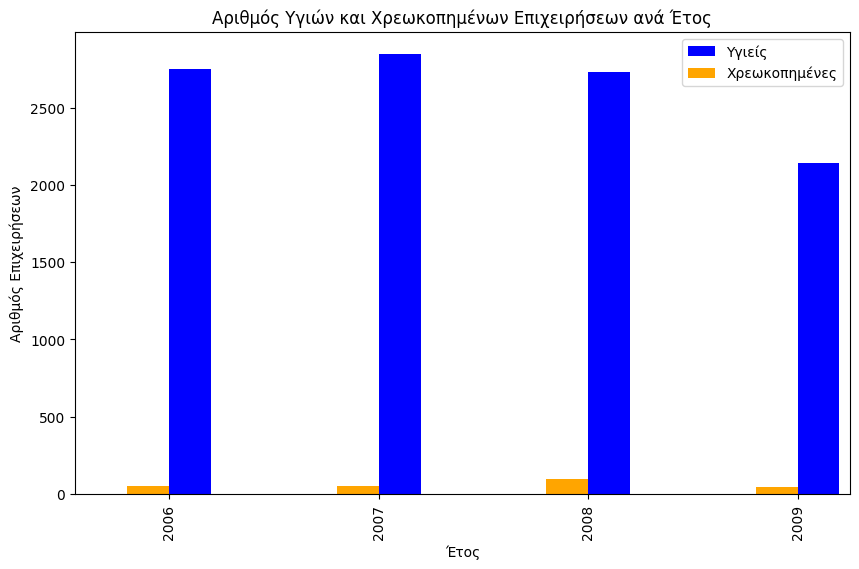

In [4]:
# Figure 1: Number of healthy and bankrupt firms, for each year.
selected_columns = ["ΕΤΟΣ", "ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)"]
data_selected = data[selected_columns]

company_counts = data_selected.groupby(["ΕΤΟΣ", "ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)"]).size().unstack(fill_value=0)

company_counts.columns = ["Υγιείς", "Χρεωκοπημένες"]

company_counts["Υγιείς"].plot(kind='bar', color='blue', position=0, width=0.2, figsize=(10, 6), label="Υγιείς")

company_counts["Χρεωκοπημένες"].plot(kind='bar', color='orange', position=1, width=0.2, figsize=(10, 6), label="Χρεωκοπημένες")

plt.title("Αριθμός Υγιών και Χρεωκοπημένων Επιχειρήσεων ανά Έτος")
plt.xlabel("Έτος")
plt.ylabel("Αριθμός Επιχειρήσεων")
plt.legend()

plt.grid(False)
plt.show()

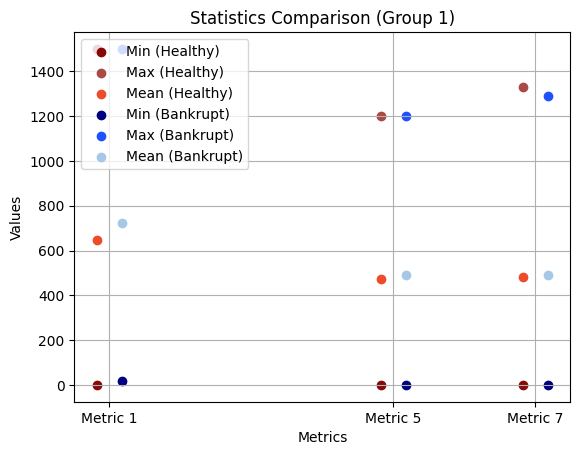

<Figure size 1200x600 with 0 Axes>

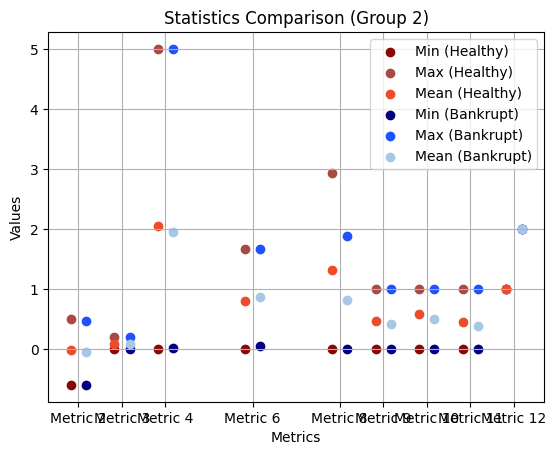

<Figure size 1200x600 with 0 Axes>

In [5]:
# Figure 2: The min, max, average value for each indicator. [NEEDS IMPROVEMENT]
data_selected = data.iloc[:, 0:12]

healthy_data = data_selected[data_selected["ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)"] != 2]
bankrupt_data = data_selected[data_selected["ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)"] == 2]

healthy_stats = healthy_data.describe().loc[["min", "max", "mean"]]
bankrupt_stats = bankrupt_data.describe().loc[["min", "max", "mean"]]

healthy_stats_array = healthy_stats.to_numpy()
bankrupt_stats_array = bankrupt_stats.to_numpy()

mins_h = healthy_stats_array.min(axis=0)
maxes_h = healthy_stats_array.max(axis=0)
means_h = healthy_stats_array.mean(axis=0)
stds_h = healthy_stats_array.std(axis=0)

mins_b = bankrupt_stats_array.min(axis=0)
maxes_b = bankrupt_stats_array.max(axis=0)
means_b = bankrupt_stats_array.mean(axis=0)
stds_b = bankrupt_stats_array.std(axis=0)

positions = np.arange(12)

box_width = 0.35

group1_indices = [0, 4, 6]
group2_indices = [i for i in range(12) if i not in group1_indices]
plt.scatter(positions[group1_indices] - box_width / 2, mins_h[group1_indices], color='#880808', label='Min (Healthy)', marker='o')
plt.scatter(positions[group1_indices] - box_width / 2, maxes_h[group1_indices], color='#AA4A44', label='Max (Healthy)', marker='o')
plt.scatter(positions[group1_indices] - box_width / 2, means_h[group1_indices], color='#EE4B2B', label='Mean (Healthy)', marker='o')

plt.scatter(positions[group1_indices] + box_width / 2, mins_b[group1_indices], color='#000080', label='Min (Bankrupt)', marker='o')
plt.scatter(positions[group1_indices] + box_width / 2, maxes_b[group1_indices], color='#1F51FF', label='Max (Bankrupt)', marker='o')
plt.scatter(positions[group1_indices] + box_width / 2, means_b[group1_indices], color='#A7C7E7', label='Mean (Bankrupt)', marker='o')

plt.title('Statistics Comparison (Group 1)')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(positions[group1_indices], ['Metric {}'.format(i+1) for i in group1_indices])
plt.legend()
plt.grid(True)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

plt.scatter(positions[group2_indices] - box_width / 2, mins_h[group2_indices], color='#880808', label='Min (Healthy)', marker='o')
plt.scatter(positions[group2_indices] - box_width / 2, maxes_h[group2_indices], color='#AA4A44', label='Max (Healthy)', marker='o')
plt.scatter(positions[group2_indices] - box_width / 2, means_h[group2_indices], color='#EE4B2B', label='Mean (Healthy)', marker='o')

plt.scatter(positions[group2_indices] + box_width / 2, mins_b[group2_indices], color='#000080', label='Min (Bankrupt)', marker='o')
plt.scatter(positions[group2_indices] + box_width / 2, maxes_b[group2_indices], color='#1F51FF', label='Max (Bankrupt)', marker='o')
plt.scatter(positions[group2_indices] + box_width / 2, means_b[group2_indices], color='#A7C7E7', label='Mean (Bankrupt)', marker='o')

plt.title('Statistics Comparison (Group 2)')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(positions[group2_indices], ['Metric {}'.format(i+1) for i in group2_indices])
plt.legend()
plt.grid(True)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [6]:
# Check for any missing records [e.g. NaNs] and notify the user with a message
healthy_has_nan = healthy_data.isna().any().any()
bankrupt_has_nan = bankrupt_data.isna().any().any()

if healthy_has_nan or bankrupt_has_nan:
  message = "Warning: Missing data (NaNs) were found in the dataset. Please review the data before interpreting the results."
  print(message)

In [14]:
# Normalize the data in the interval [0,1] using a mapminmax technique.
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_selected)

print(normalized_data[:5])

[[6.75944544e-01 5.56137497e-01 1.92525990e-01 1.92989153e-01
  4.73222125e-01 3.18549034e-01 4.09273866e-01 1.02743083e-01
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.74376836e-01 6.36056694e-01 7.88767150e-02 2.82998544e-01
  2.79931234e-01 3.95393180e-01 5.96867903e-03 4.01405984e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.51083518e-01 5.54176131e-01 4.67809815e-01 3.14916222e-01
  2.92181739e-01 3.29722107e-01 2.14714383e-02 4.10972332e-01
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.28491703e-01 7.23894800e-01 2.90363000e-03 2.69259350e-01
  3.45423924e-01 4.09265233e-01 9.13506982e-04 4.88531801e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.65404374e-02 7.08216000e-01 8.65660000e-04 6.59892434e-01
  9.87903173e-02 1.52183376e-01 3.92959278e-02 5.18276603e-01
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [7]:
def load_data(normalized_data):
    data_df = pd.DataFrame(normalized_data)
    X = data_df.iloc[:, :-2]
    y = data_df.iloc[:, -2]
    return X, y

In [8]:
def train_model(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    return classifier

In [9]:
def evaluate_model(classifier, X, y):
    y_pred = classifier.predict(X)
    cm = confusion_matrix(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_roc = roc_auc_score(y, y_pred)
    success_rate_bankrupt = cm[1, 1] / sum(y == 1)
    success_rate_healthy = cm[0, 0] / sum(y == 0)
    return cm, f1, auc_roc, success_rate_bankrupt, success_rate_healthy

In [10]:
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.xticks([0, 1], ['Predicted Healthy', 'Predicted Bankrupt'])
    plt.yticks([0, 1], ['Actual Healthy', 'Actual Bankrupt'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='black')
    plt.tight_layout()
    plt.show()


In [33]:
def cross_validation(X, y, classifiers, n_splits=4, random_state=None):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    f1_scores_train = {clf_name: {'healthy': [], 'bankrupt': []} for clf_name in classifiers}
    f1_scores_test = {clf_name: {'healthy': [], 'bankrupt': []} for clf_name in classifiers}
    success_rates_train = {clf_name: {'healthy': [], 'bankrupt': []} for clf_name in classifiers}
    success_rates_test = {clf_name: {'healthy': [], 'bankrupt': []} for clf_name in classifiers}

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        for clf_name, clf in classifiers.items():
            clf = train_model(clf, X_train, y_train)
            cm_train, f1_train, _, success_rate_bankrupt_train, success_rate_healthy_train = evaluate_model(clf, X_train, y_train)
            cm_test, f1_test, _, success_rate_bankrupt_test, success_rate_healthy_test = evaluate_model(clf, X_test, y_test)

            f1_scores_train[clf_name]['healthy'].append(f1_train)  # F1 score for the healthy class
            f1_scores_train[clf_name]['bankrupt'].append(f1_train)  # F1 score for the bankrupt class

            f1_scores_test[clf_name]['healthy'].append(f1_test)  # F1 score for the healthy class
            f1_scores_test[clf_name]['bankrupt'].append(f1_test)  # F1 score for the bankrupt class

            success_rates_train[clf_name]['healthy'].append(success_rate_healthy_train)
            success_rates_train[clf_name]['bankrupt'].append(success_rate_bankrupt_train)

            success_rates_test[clf_name]['healthy'].append(success_rate_healthy_test)
            success_rates_test[clf_name]['bankrupt'].append(success_rate_bankrupt_test)

            plot_confusion_matrix(cm_train, f'{clf_name} - Train Set Confusion Matrix')
            plot_confusion_matrix(cm_test, f'{clf_name} - Test Set Confusion Matrix')

    return f1_scores_train, f1_scores_test, success_rates_train, success_rates_test


In [25]:
def average_scores(success_rates_train, success_rates_test, n_splits):
    average_success_rates_train = {}
    average_success_rates_test = {}

    for clf_name, clf_rates_train in success_rates_train.items():
        average_success_rates_train[clf_name] = {'healthy': sum(clf_rates_train['healthy']) / n_splits,
                                                  'bankrupt': sum(clf_rates_train['bankrupt']) / n_splits}

    for clf_name, clf_rates_test in success_rates_test.items():
        average_success_rates_test[clf_name] = {'healthy': sum(clf_rates_test['healthy']) / n_splits,
                                                 'bankrupt': sum(clf_rates_test['bankrupt']) / n_splits}

    return average_success_rates_train, average_success_rates_test


In [48]:
# Classifiers to evaluate
classifiers = {
    'Linear Discriminant Analysis': (LinearDiscriminantAnalysis()),
    'Logistic Regression': (LogisticRegression()),
    'Decision Tree': (DecisionTreeClassifier()),
    'Random Forest': (RandomForestClassifier()),
    'k-Nearest Neighbors': (KNeighborsClassifier()),
    'Naïve Bayes': (GaussianNB()),
    'Support Vector Machines': (SVC()),
    'Gradient Boosting': (GradientBoostingClassifier())
}

Classifier: Linear Discriminant Analysis


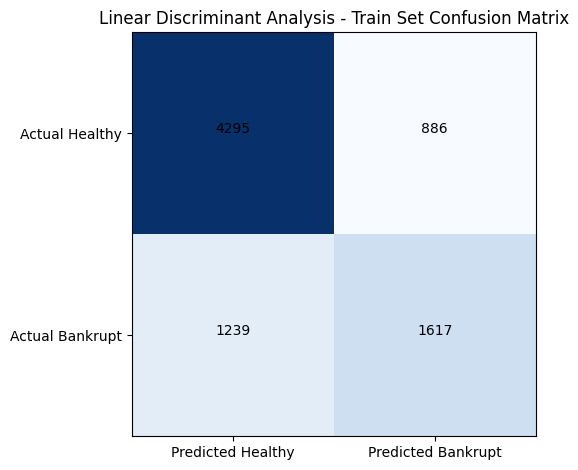

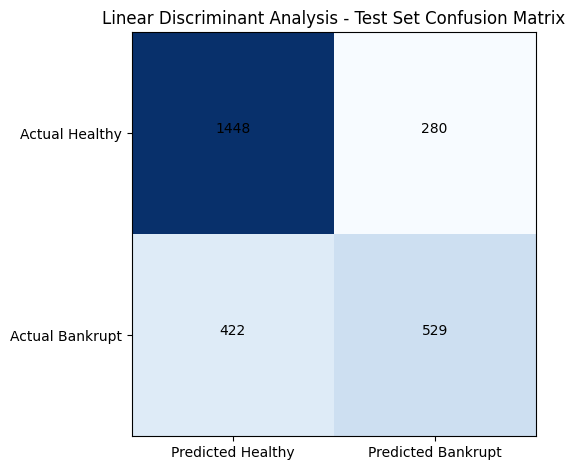

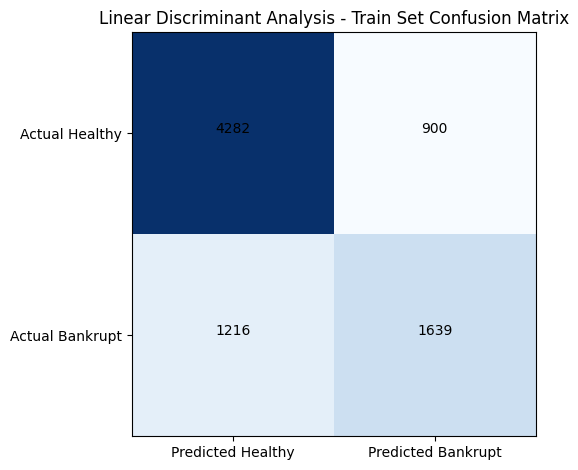

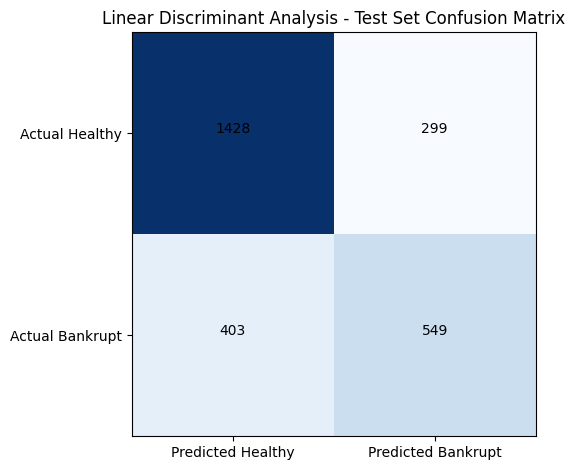

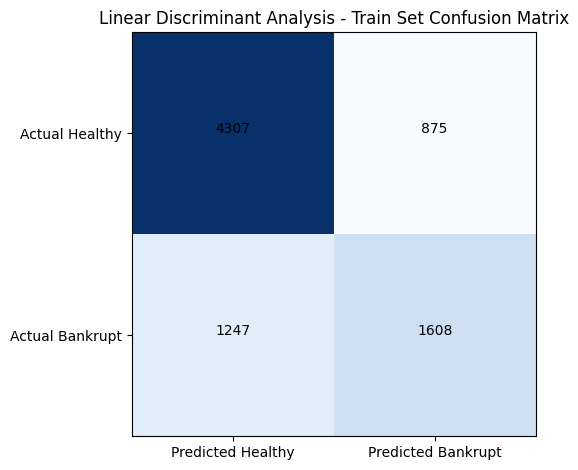

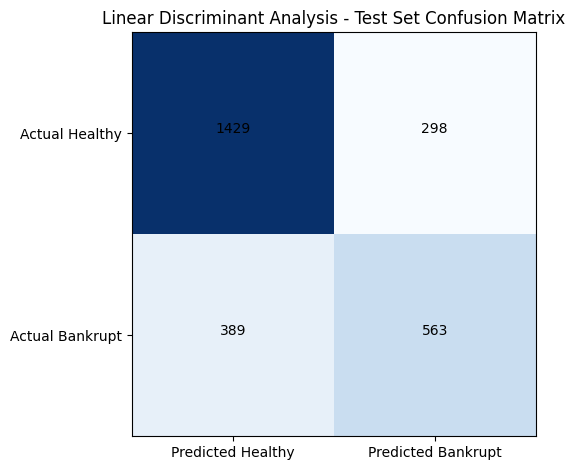

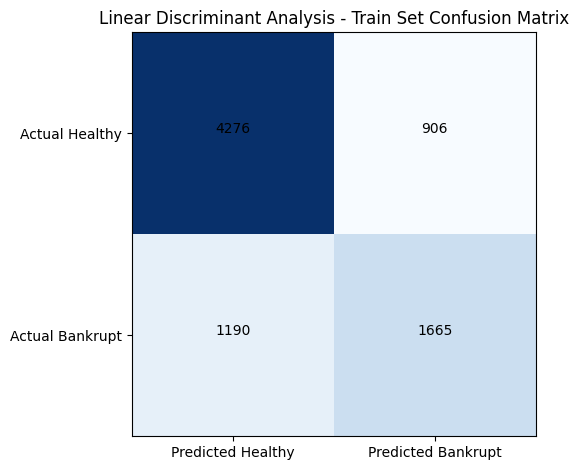

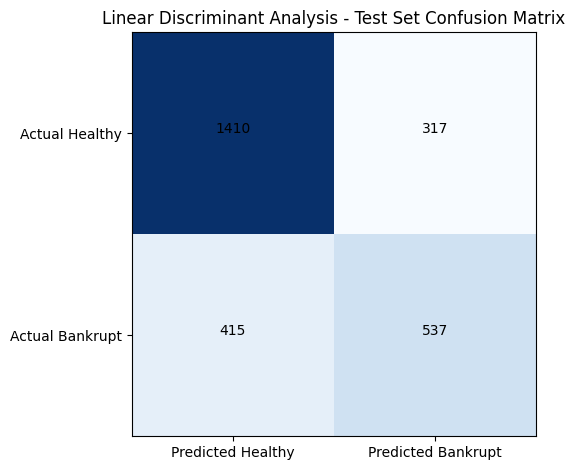


Linear Discriminant Analysis - Train Set Performance (Fold 1):
Success Rate Healthy: 0.82, Bankrupt: 0.58

Linear Discriminant Analysis - Test Set Performance (Fold 1):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Linear Discriminant Analysis - Train Set Performance (Fold 2):
Success Rate Healthy: 0.82, Bankrupt: 0.58

Linear Discriminant Analysis - Test Set Performance (Fold 2):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Linear Discriminant Analysis - Train Set Performance (Fold 3):
Success Rate Healthy: 0.82, Bankrupt: 0.58

Linear Discriminant Analysis - Test Set Performance (Fold 3):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Linear Discriminant Analysis - Train Set Performance (Fold 4):
Success Rate Healthy: 0.82, Bankrupt: 0.58

Linear Discriminant Analysis - Test Set Performance (Fold 4):
Success Rate Healthy: 0.83, Bankrupt: 0.59
Classifier: Logistic Regression


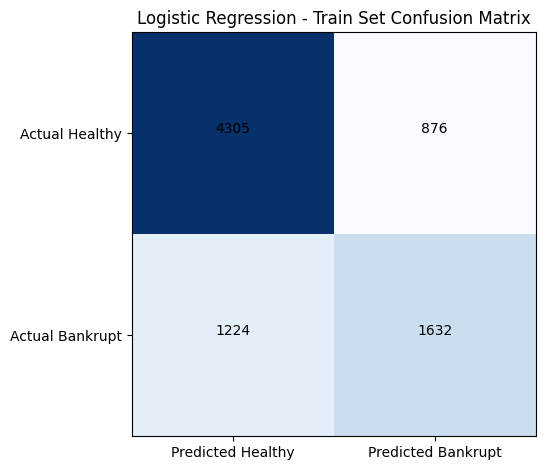

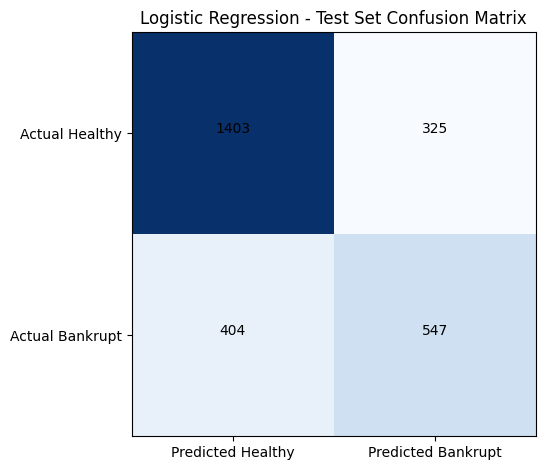

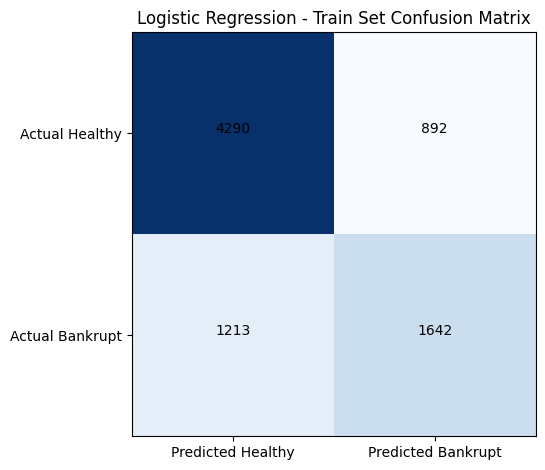

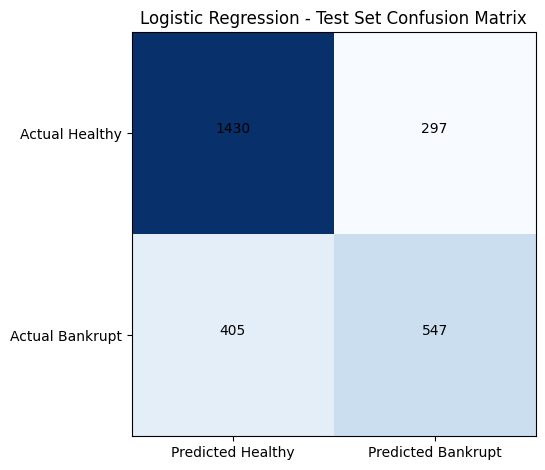

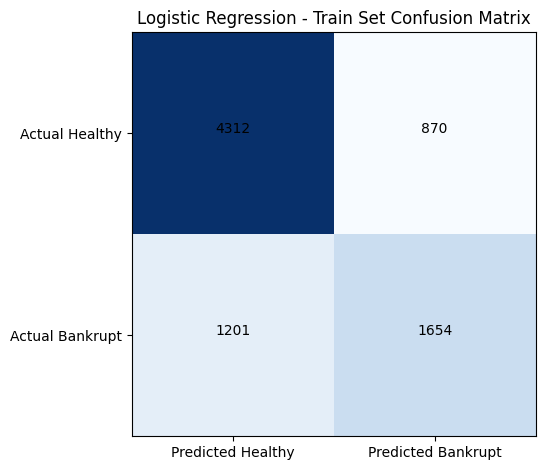

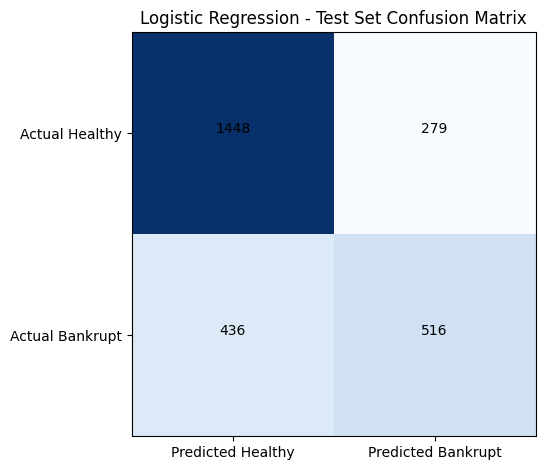

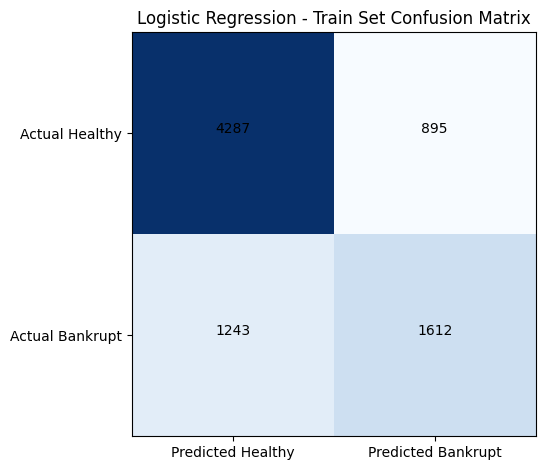

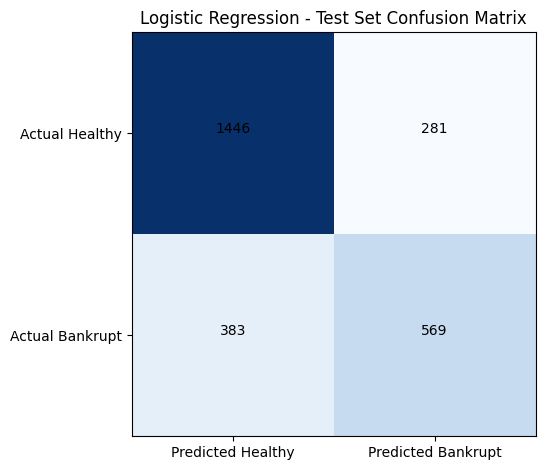


Logistic Regression - Train Set Performance (Fold 1):
Success Rate Healthy: 0.83, Bankrupt: 0.57

Logistic Regression - Test Set Performance (Fold 1):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Logistic Regression - Train Set Performance (Fold 2):
Success Rate Healthy: 0.83, Bankrupt: 0.57

Logistic Regression - Test Set Performance (Fold 2):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Logistic Regression - Train Set Performance (Fold 3):
Success Rate Healthy: 0.83, Bankrupt: 0.57

Logistic Regression - Test Set Performance (Fold 3):
Success Rate Healthy: 0.83, Bankrupt: 0.59

Logistic Regression - Train Set Performance (Fold 4):
Success Rate Healthy: 0.83, Bankrupt: 0.57

Logistic Regression - Test Set Performance (Fold 4):
Success Rate Healthy: 0.83, Bankrupt: 0.59
Classifier: Decision Tree


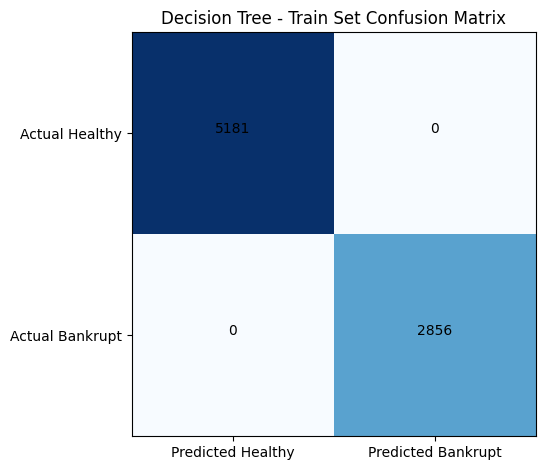

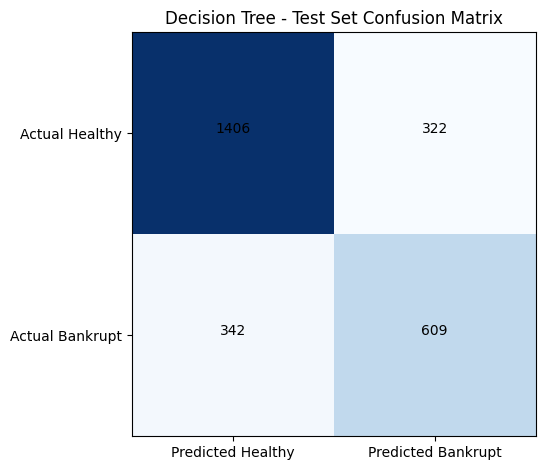

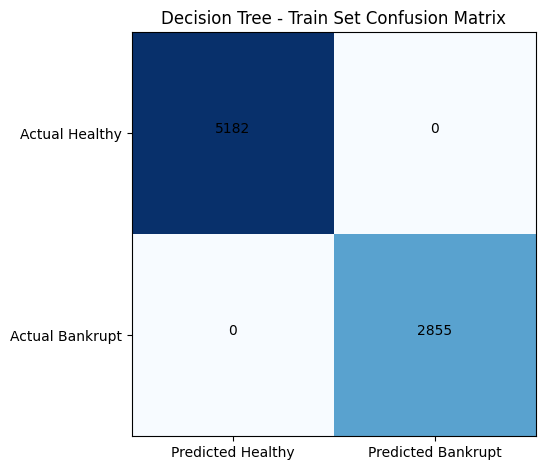

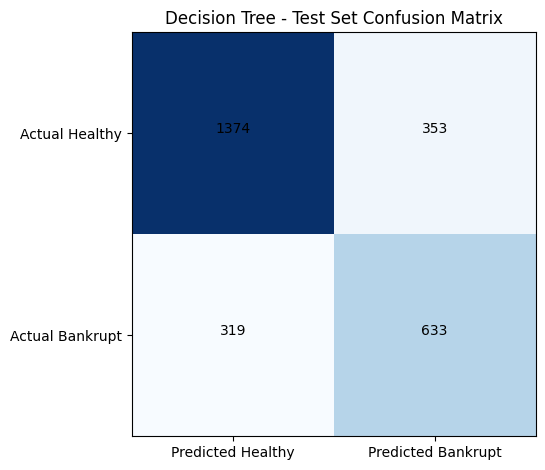

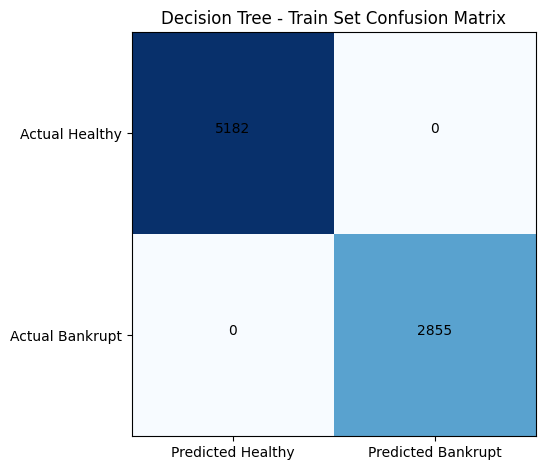

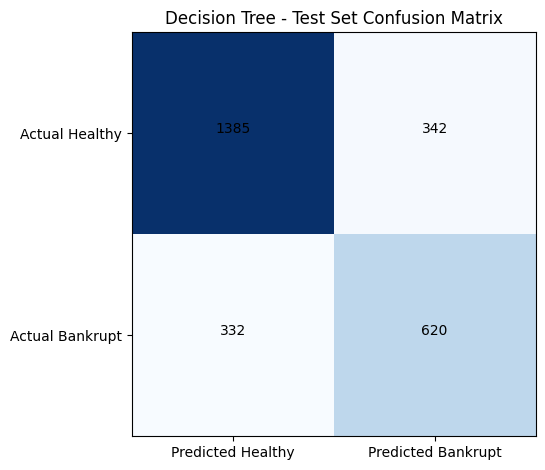

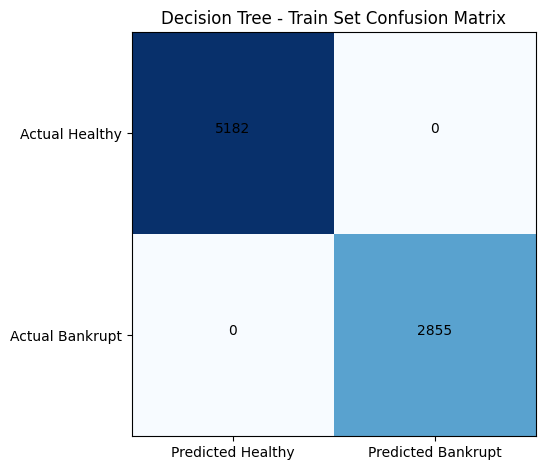

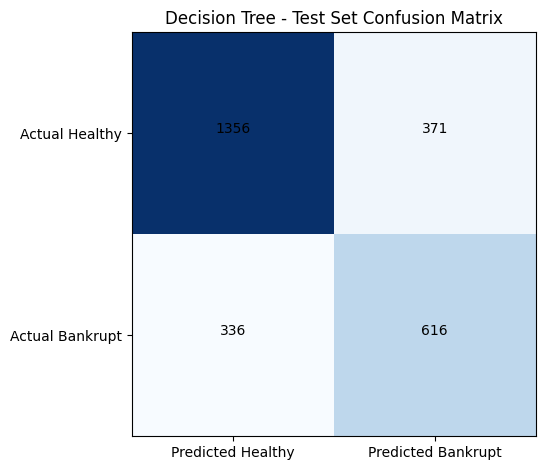


Decision Tree - Train Set Performance (Fold 1):
Success Rate Healthy: 0.95, Bankrupt: 0.91

Decision Tree - Test Set Performance (Fold 1):
Success Rate Healthy: 0.94, Bankrupt: 0.90

Decision Tree - Train Set Performance (Fold 2):
Success Rate Healthy: 0.95, Bankrupt: 0.91

Decision Tree - Test Set Performance (Fold 2):
Success Rate Healthy: 0.94, Bankrupt: 0.90

Decision Tree - Train Set Performance (Fold 3):
Success Rate Healthy: 0.95, Bankrupt: 0.91

Decision Tree - Test Set Performance (Fold 3):
Success Rate Healthy: 0.94, Bankrupt: 0.90

Decision Tree - Train Set Performance (Fold 4):
Success Rate Healthy: 0.95, Bankrupt: 0.91

Decision Tree - Test Set Performance (Fold 4):
Success Rate Healthy: 0.94, Bankrupt: 0.90
Classifier: Random Forest


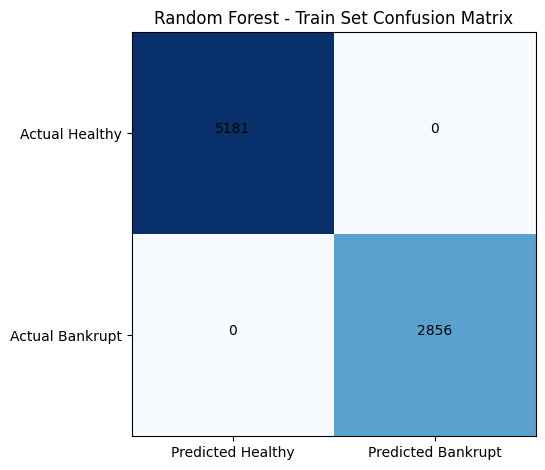

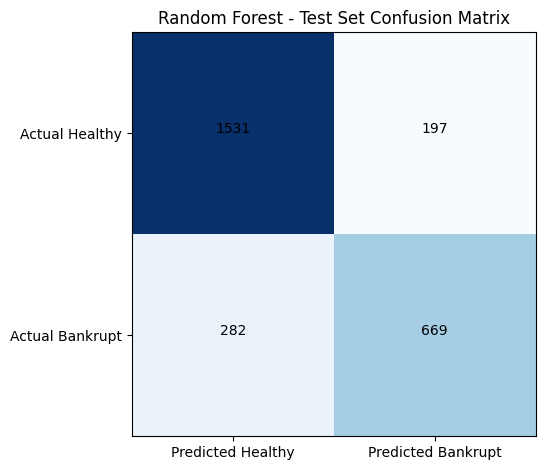

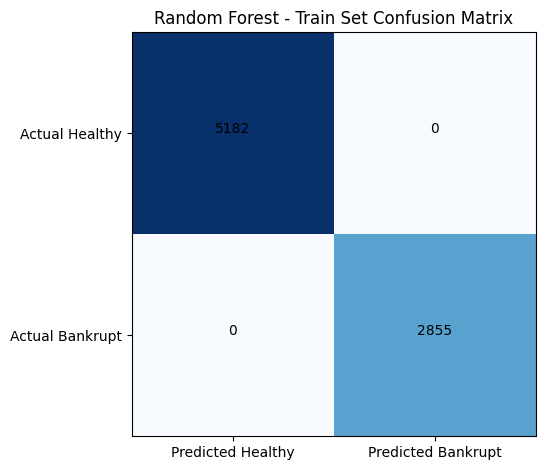

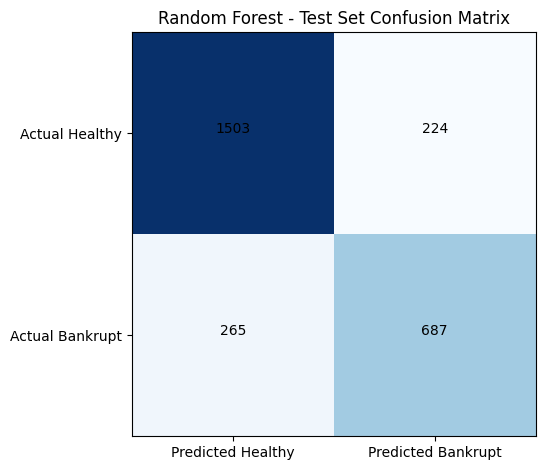

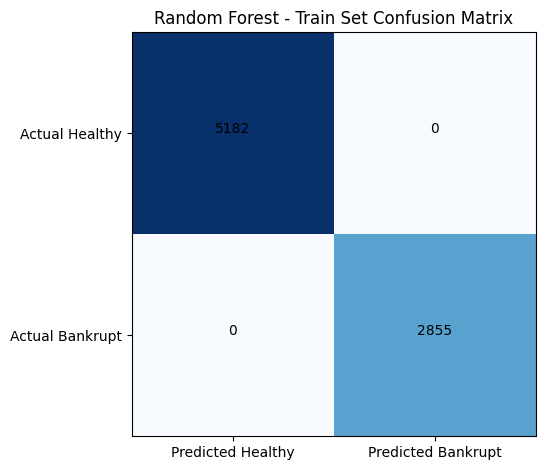

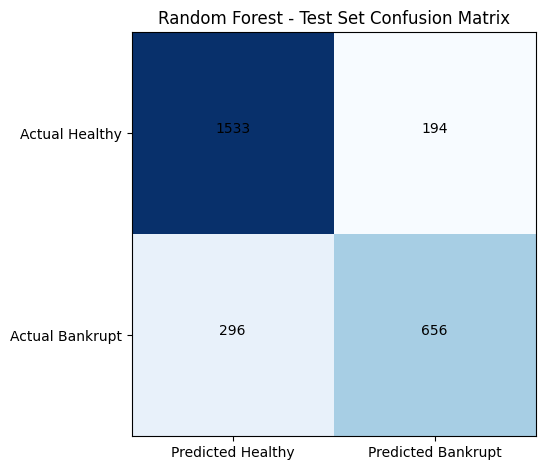

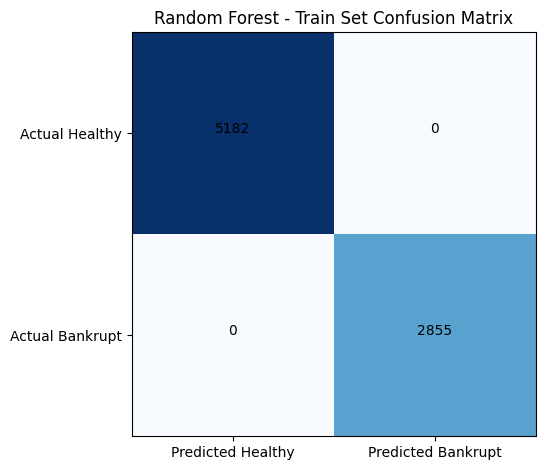

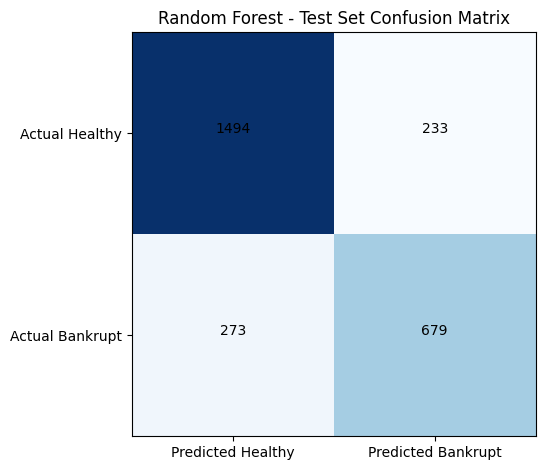


Random Forest - Train Set Performance (Fold 1):
Success Rate Healthy: 0.97, Bankrupt: 0.93

Random Forest - Test Set Performance (Fold 1):
Success Rate Healthy: 0.96, Bankrupt: 0.94

Random Forest - Train Set Performance (Fold 2):
Success Rate Healthy: 0.97, Bankrupt: 0.93

Random Forest - Test Set Performance (Fold 2):
Success Rate Healthy: 0.96, Bankrupt: 0.94

Random Forest - Train Set Performance (Fold 3):
Success Rate Healthy: 0.97, Bankrupt: 0.93

Random Forest - Test Set Performance (Fold 3):
Success Rate Healthy: 0.96, Bankrupt: 0.94

Random Forest - Train Set Performance (Fold 4):
Success Rate Healthy: 0.97, Bankrupt: 0.93

Random Forest - Test Set Performance (Fold 4):
Success Rate Healthy: 0.96, Bankrupt: 0.94
Classifier: k-Nearest Neighbors


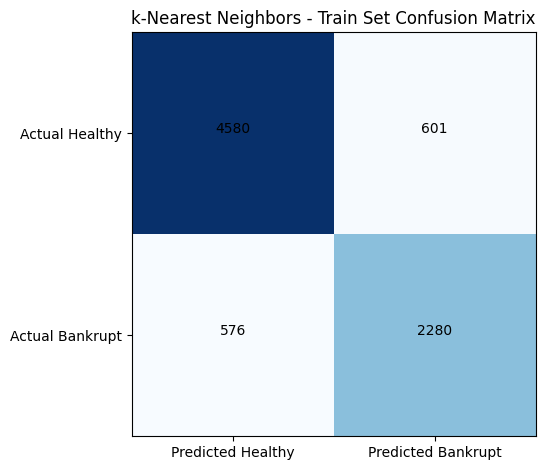

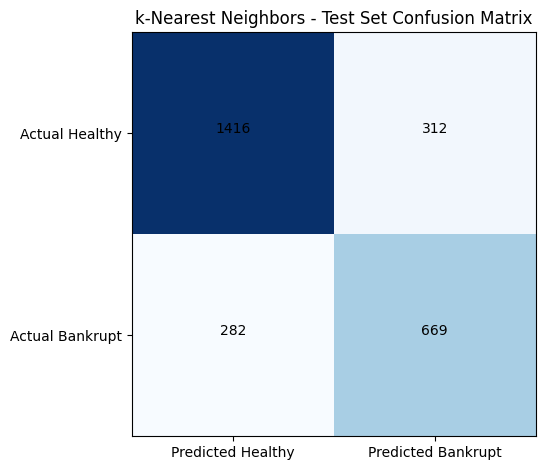

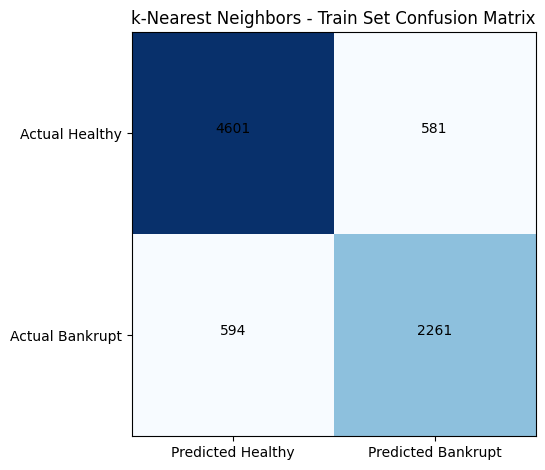

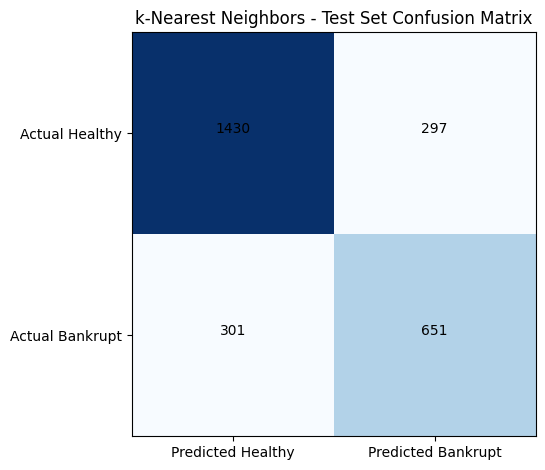

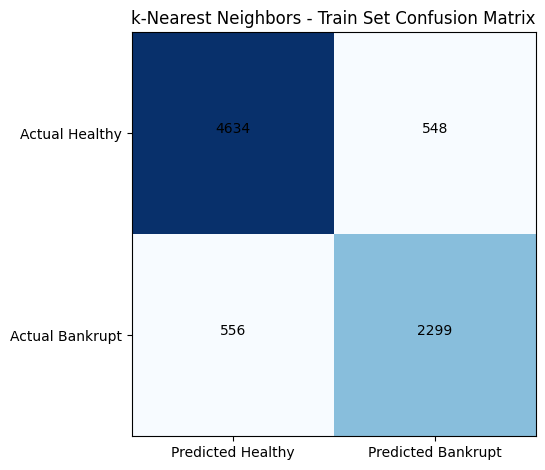

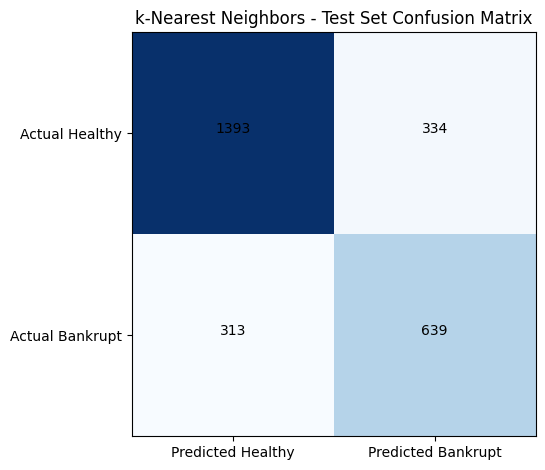

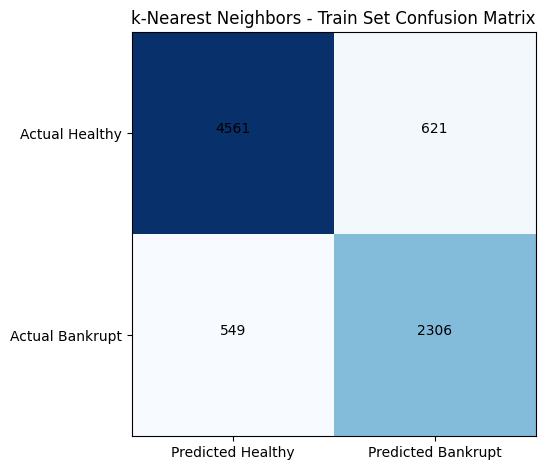

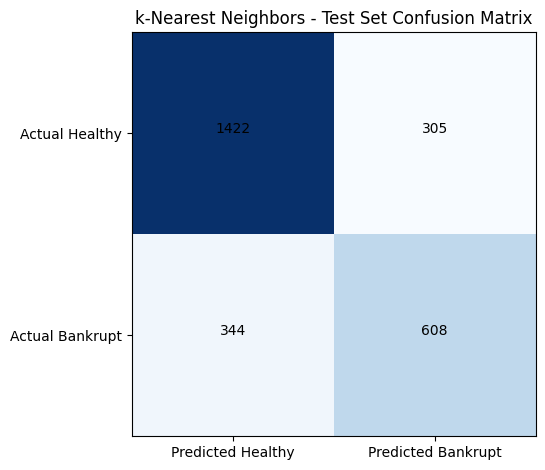


k-Nearest Neighbors - Train Set Performance (Fold 1):
Success Rate Healthy: 0.87, Bankrupt: 0.76

k-Nearest Neighbors - Test Set Performance (Fold 1):
Success Rate Healthy: 0.87, Bankrupt: 0.80

k-Nearest Neighbors - Train Set Performance (Fold 2):
Success Rate Healthy: 0.87, Bankrupt: 0.76

k-Nearest Neighbors - Test Set Performance (Fold 2):
Success Rate Healthy: 0.87, Bankrupt: 0.80

k-Nearest Neighbors - Train Set Performance (Fold 3):
Success Rate Healthy: 0.87, Bankrupt: 0.76

k-Nearest Neighbors - Test Set Performance (Fold 3):
Success Rate Healthy: 0.87, Bankrupt: 0.80

k-Nearest Neighbors - Train Set Performance (Fold 4):
Success Rate Healthy: 0.87, Bankrupt: 0.76

k-Nearest Neighbors - Test Set Performance (Fold 4):
Success Rate Healthy: 0.87, Bankrupt: 0.80
Classifier: Naïve Bayes


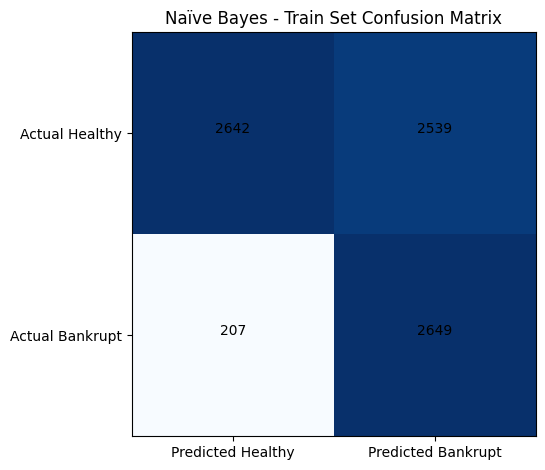

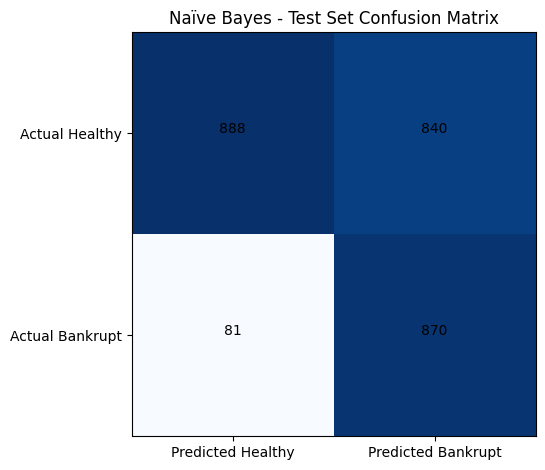

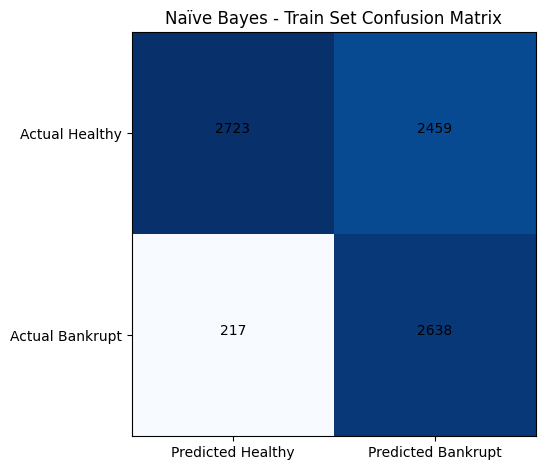

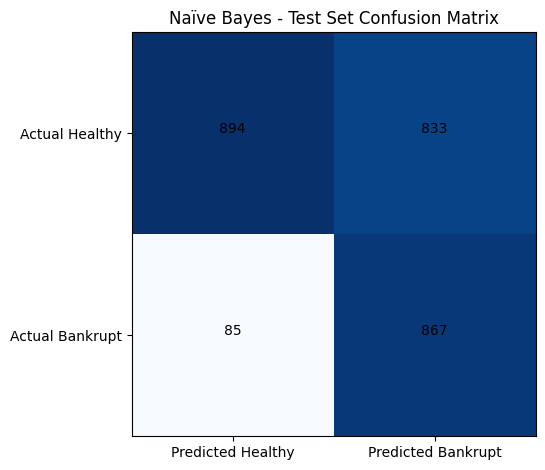

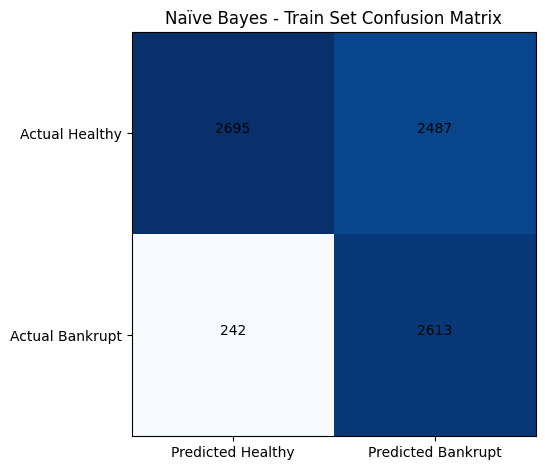

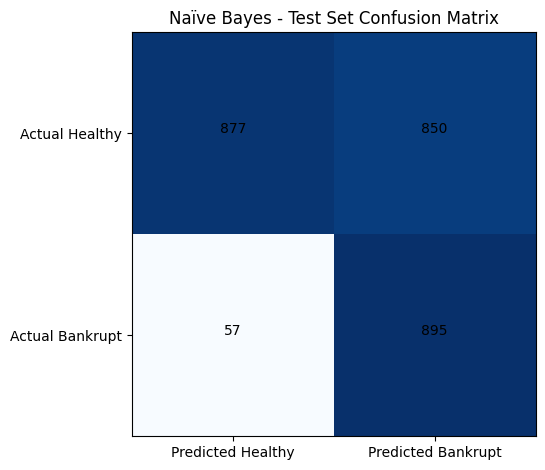

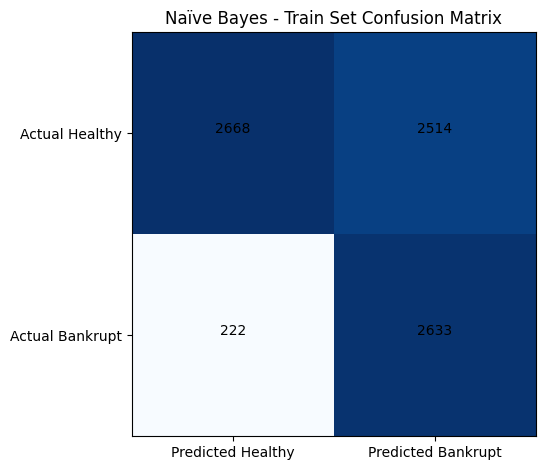

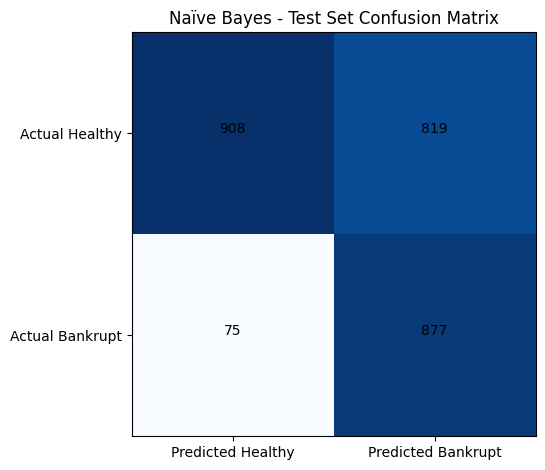


Naïve Bayes - Train Set Performance (Fold 1):
Success Rate Healthy: 0.52, Bankrupt: 0.92

Naïve Bayes - Test Set Performance (Fold 1):
Success Rate Healthy: 0.51, Bankrupt: 0.93

Naïve Bayes - Train Set Performance (Fold 2):
Success Rate Healthy: 0.52, Bankrupt: 0.92

Naïve Bayes - Test Set Performance (Fold 2):
Success Rate Healthy: 0.51, Bankrupt: 0.93

Naïve Bayes - Train Set Performance (Fold 3):
Success Rate Healthy: 0.52, Bankrupt: 0.92

Naïve Bayes - Test Set Performance (Fold 3):
Success Rate Healthy: 0.51, Bankrupt: 0.93

Naïve Bayes - Train Set Performance (Fold 4):
Success Rate Healthy: 0.52, Bankrupt: 0.92

Naïve Bayes - Test Set Performance (Fold 4):
Success Rate Healthy: 0.51, Bankrupt: 0.93
Classifier: Support Vector Machines


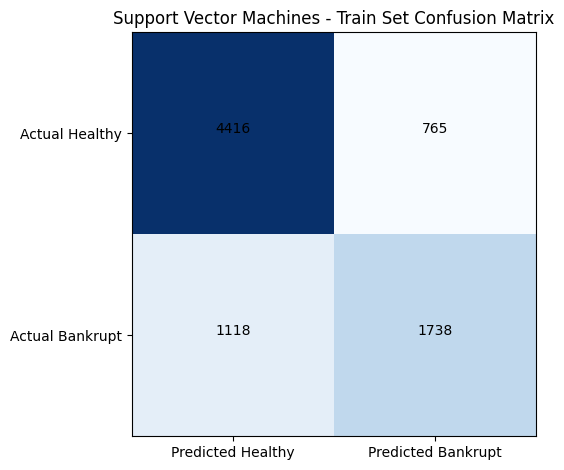

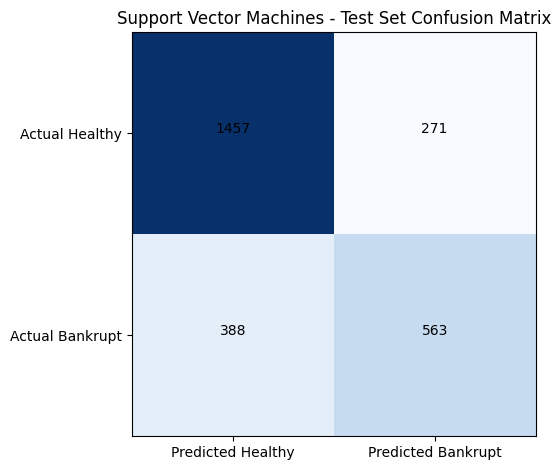

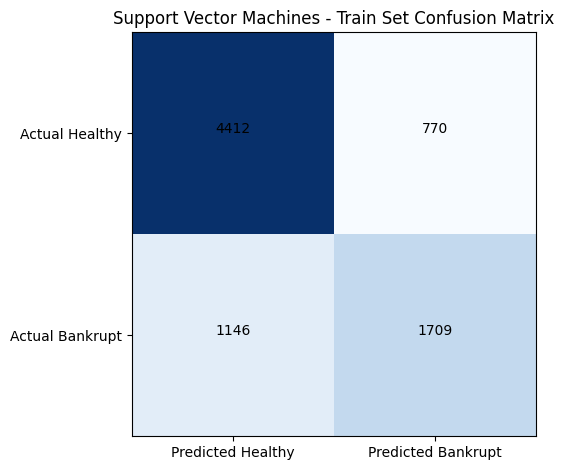

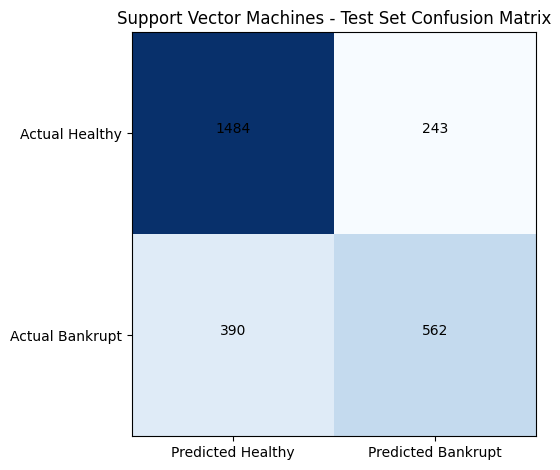

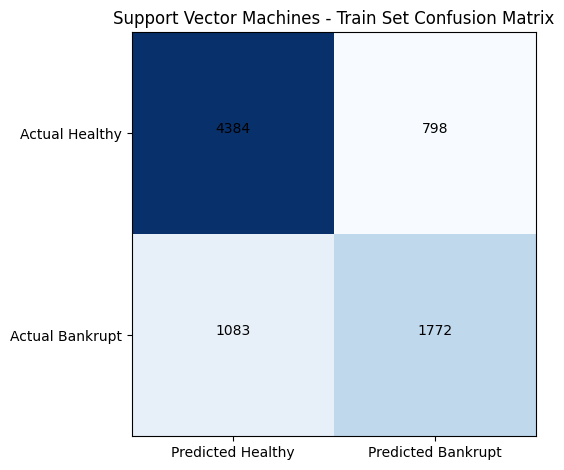

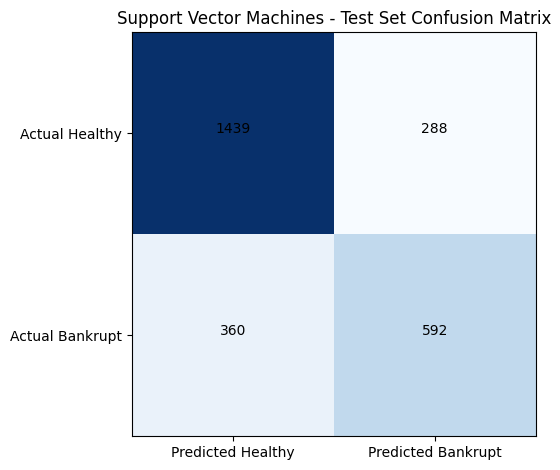

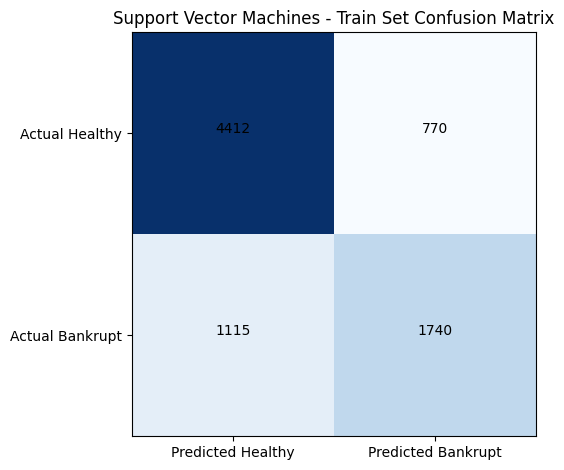

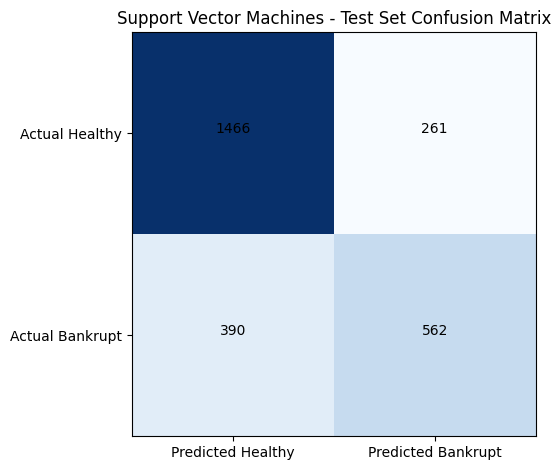


Support Vector Machines - Train Set Performance (Fold 1):
Success Rate Healthy: 0.85, Bankrupt: 0.60

Support Vector Machines - Test Set Performance (Fold 1):
Success Rate Healthy: 0.86, Bankrupt: 0.63

Support Vector Machines - Train Set Performance (Fold 2):
Success Rate Healthy: 0.85, Bankrupt: 0.60

Support Vector Machines - Test Set Performance (Fold 2):
Success Rate Healthy: 0.86, Bankrupt: 0.63

Support Vector Machines - Train Set Performance (Fold 3):
Success Rate Healthy: 0.85, Bankrupt: 0.60

Support Vector Machines - Test Set Performance (Fold 3):
Success Rate Healthy: 0.86, Bankrupt: 0.63

Support Vector Machines - Train Set Performance (Fold 4):
Success Rate Healthy: 0.85, Bankrupt: 0.60

Support Vector Machines - Test Set Performance (Fold 4):
Success Rate Healthy: 0.86, Bankrupt: 0.63
Classifier: Gradient Boosting


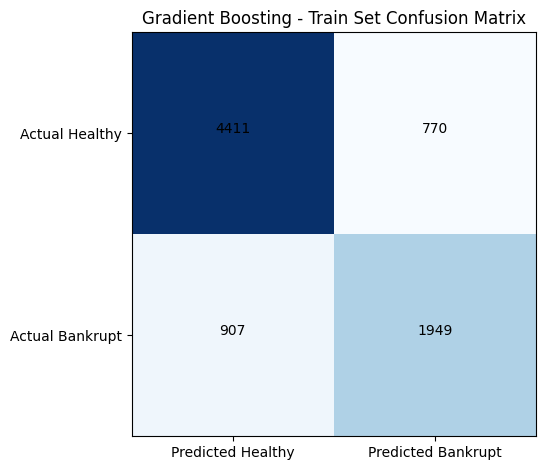

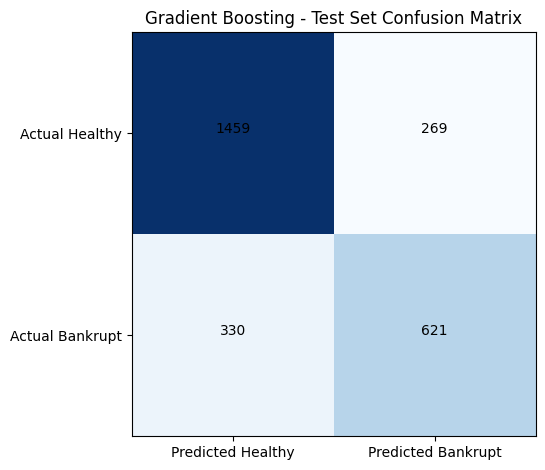

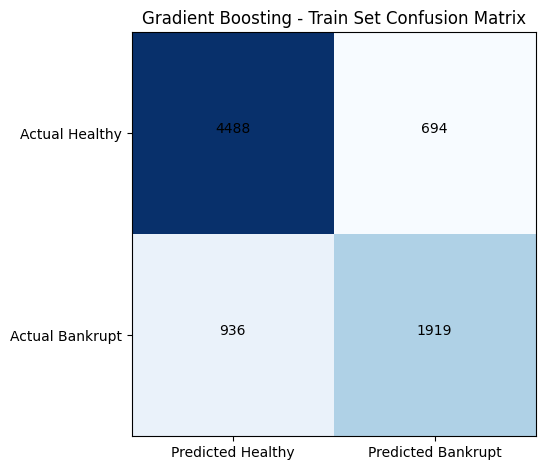

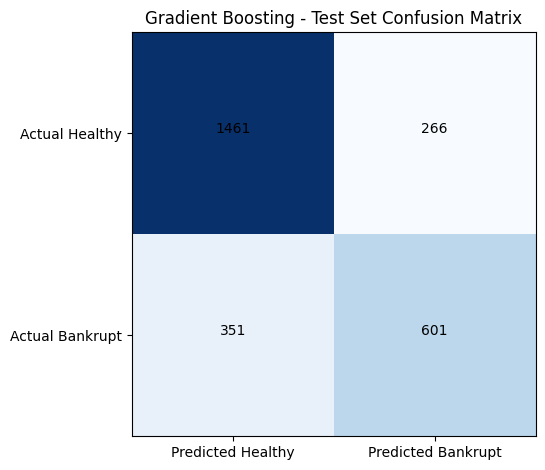

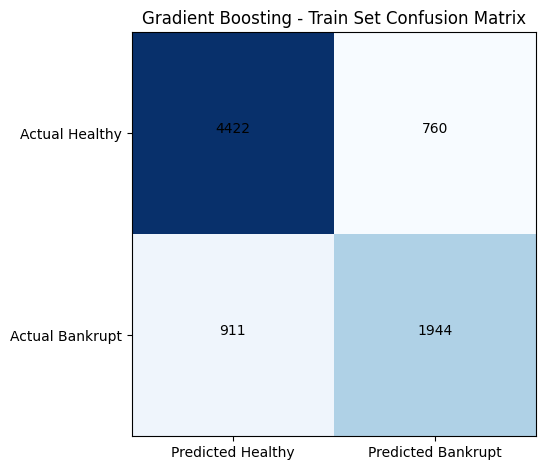

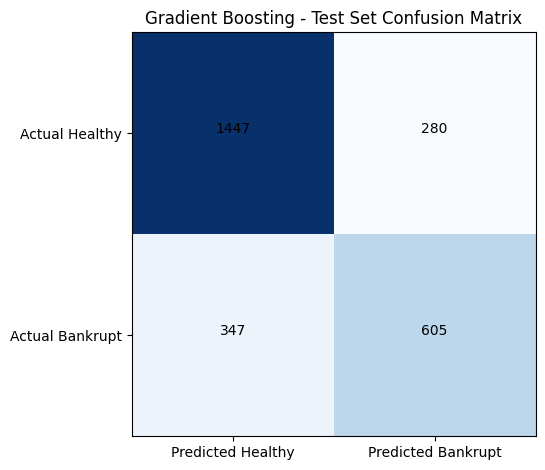

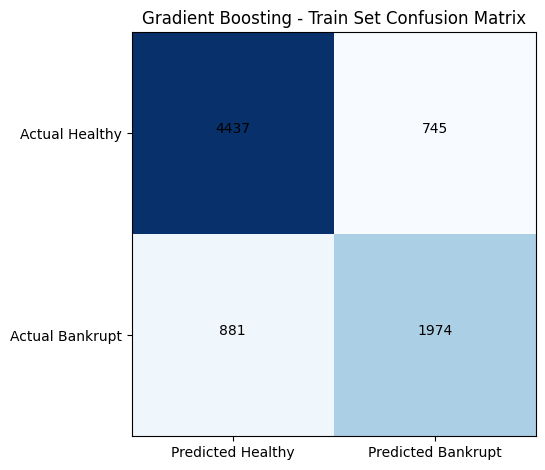

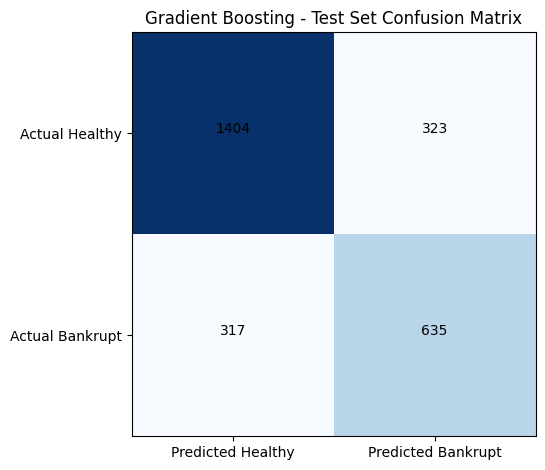


Gradient Boosting - Train Set Performance (Fold 1):
Success Rate Healthy: 0.85, Bankrupt: 0.68

Gradient Boosting - Test Set Performance (Fold 1):
Success Rate Healthy: 0.84, Bankrupt: 0.70

Gradient Boosting - Train Set Performance (Fold 2):
Success Rate Healthy: 0.85, Bankrupt: 0.68

Gradient Boosting - Test Set Performance (Fold 2):
Success Rate Healthy: 0.84, Bankrupt: 0.70

Gradient Boosting - Train Set Performance (Fold 3):
Success Rate Healthy: 0.85, Bankrupt: 0.68

Gradient Boosting - Test Set Performance (Fold 3):
Success Rate Healthy: 0.84, Bankrupt: 0.70

Gradient Boosting - Train Set Performance (Fold 4):
Success Rate Healthy: 0.85, Bankrupt: 0.68

Gradient Boosting - Test Set Performance (Fold 4):
Success Rate Healthy: 0.84, Bankrupt: 0.70

Success Rates for Each Classifier:
Linear Discriminant Analysis
Healthy: 0.8311499272197962
Bankrupt: 0.5896103896103896
Logistic Regression
Healthy: 0.8347889374090247
Bankrupt: 0.5883116883116883
Decision Tree
Healthy: 0.938864628820

In [53]:
import pandas as pd

# Initialize an empty list to store dictionaries
results_list = []

# Initialize a dictionary to store success rates for each classifier
success_rates_dict = {}

# Perform cross-validation and parameter search for each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")

    # Perform cross-validation and evaluation
    f1_scores_train, f1_scores_test, success_rates_train, success_rates_test = cross_validation(X, y, {classifier_name: classifier}, n_splits=4, random_state=None)

    # Initialize lists to store success rates for this classifier
    success_rates_dict[classifier_name] = {'healthy': [], 'bankrupt': []}

    # Loop through folds
    for fold in range(4):  # Assuming 4 folds
        # Retrieve evaluation metrics for train set
        f1_train = f1_scores_train[classifier_name]['healthy'][fold], f1_scores_train[classifier_name]['bankrupt'][fold]
        # Retrieve evaluation metrics for test set
        f1_test = f1_scores_test[classifier_name]['healthy'][fold], f1_scores_test[classifier_name]['bankrupt'][fold]

        # Evaluate the model to get TP, TN, FP, FN, and AUC ROC
        cm_train, _, auc_roc_train, _, _ = evaluate_model(classifier, X_train, y_train)
        cm_test, _, auc_roc_test, _, _ = evaluate_model(classifier, X_test, y_test)

        # Retrieve success rates for train set
        success_rate_healthy_train = cm_train[0, 0] / (cm_train[0, 0] + cm_train[0, 1])
        success_rate_bankrupt_train = cm_train[1, 1] / (cm_train[1, 0] + cm_train[1, 1])
        # Retrieve success rates for test set
        success_rate_healthy_test = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
        success_rate_bankrupt_test = cm_test[1, 1] / (cm_test[1, 0] + cm_test[1, 1])

        # Print performance metrics
        print(f"\n{classifier_name} - Train Set Performance (Fold {fold + 1}):")
        print(f"Success Rate Healthy: {success_rate_healthy_train:.2f}, Bankrupt: {success_rate_bankrupt_train:.2f}")
        print(f"\n{classifier_name} - Test Set Performance (Fold {fold + 1}):")
        print(f"Success Rate Healthy: {success_rate_healthy_test:.2f}, Bankrupt: {success_rate_bankrupt_test:.2f}")

        # Add success rates to the dictionary
        success_rates_dict[classifier_name]['healthy'].append(success_rate_healthy_test)
        success_rates_dict[classifier_name]['bankrupt'].append(success_rate_bankrupt_test)

        # Add results to list of dictionaries with actual values
        results_list.append({'Classifier Name': classifier_name,
                             'Dataset': 'Train',
                             'Balance': 'Unbalanced',  # Assuming unbalanced since no information provided
                             'Num Training Samples': len(X_train),
                             'Num Non-Healthy Companies': sum(y_train),
                             'TP': cm_train[1, 1],
                             'TN': cm_train[0, 0],
                             'FP': cm_train[0, 1],
                             'FN': cm_train[1, 0],
                             'F1 Score': f1_train[0],
                             'AUC ROC': auc_roc_train})

        results_list.append({'Classifier Name': classifier_name,
                             'Dataset': 'Test',
                             'Balance': 'Unbalanced',  # Assuming unbalanced since no information provided
                             'Num Training Samples': len(X_test),
                             'Num Non-Healthy Companies': sum(y_test),
                             'TP': cm_test[1, 1],
                             'TN': cm_test[0, 0],
                             'FP': cm_test[0, 1],
                             'FN': cm_test[1, 0],
                             'F1 Score': f1_test[0],
                             'AUC ROC': auc_roc_test})

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Save results to CSV
results_df.to_csv('unbalancedDataOutcomes.csv', index=False)

# Print success rates for each classifier
print("\nSuccess Rates for Each Classifier:")
for classifier_name, rates in success_rates_dict.items():
    print(classifier_name)
    print("Healthy:", sum(rates['healthy']) / len(rates['healthy']))
    print("Bankrupt:", sum(rates['bankrupt']) / len(rates['bankrupt']))


In [51]:
# Define the performance thresholds
bankrupt_threshold = 0.60
non_bankrupt_threshold = 0.70

# Initialize a list to store the names of models that meet the performance criteria
best_models = []

# Check each classifier's success rates against the thresholds
for classifier_name, rates in success_rates_dict.items():
    avg_success_rate_bankrupt = sum(rates['bankrupt']) / len(rates['bankrupt'])
    avg_success_rate_non_bankrupt = sum(rates['healthy']) / len(rates['healthy'])

    # Check if the model meets both performance criteria
    if avg_success_rate_bankrupt >= bankrupt_threshold and avg_success_rate_non_bankrupt >= non_bankrupt_threshold:
        best_models.append(classifier_name)

# Print the best models
print("Best Models:")
for model in best_models:
    print(model)


Best Models:
Decision Tree
Random Forest
k-Nearest Neighbors
Gradient Boosting


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.utils import shuffle

# Initialize an empty list to store dictionaries
results_list = []

# Initialize a dictionary to store success rates for each classifier
success_rates_dict = {}

# Define a function to balance the training set
def balance_train_set(X_train, y_train):
    # Calculate the ratio of healthy to bankrupt firms
    ratio = sum(y_train == 0) / sum(y_train == 1)
    # If the ratio is more than 3 healthy firms for each bankrupt firm, balance the dataset
    if ratio > 3:
        # Find the indices of bankrupt firms
        bankrupt_indices = np.where(y_train == 1)[0]
        # Randomly select as many healthy firms as needed to achieve the desired ratio
        healthy_indices_to_keep = np.random.choice(np.where(y_train == 0)[0], size=len(bankrupt_indices) * 3, replace=False)
        # Combine the selected healthy indices with bankrupt indices
        indices_to_keep = np.concatenate([bankrupt_indices, healthy_indices_to_keep])
        # Shuffle the indices to maintain randomness
        indices_to_keep = shuffle(indices_to_keep)
        # Update X_train and y_train
        X_train_balanced = X_train.iloc[indices_to_keep]
        y_train_balanced = y_train.iloc[indices_to_keep]
        return X_train_balanced, y_train_balanced
    else:
        return X_train, y_train

# Perform cross-validation and parameter search for each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")

    # Perform cross-validation with 4 folds
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=None)
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Balance the training set if needed
        X_train_balanced, y_train_balanced = balance_train_set(X_train, y_train)

        # Train the classifier
        classifier.fit(X_train_balanced, y_train_balanced)

        # Evaluate the model
        cm_train = confusion_matrix(y_train_balanced, classifier.predict(X_train_balanced))
        cm_test = confusion_matrix(y_test, classifier.predict(X_test))
        f1_train = f1_score(y_train_balanced, classifier.predict(X_train_balanced))
        f1_test = f1_score(y_test, classifier.predict(X_test))
        auc_roc_train = roc_auc_score(y_train_balanced, classifier.predict(X_train_balanced))
        auc_roc_test = roc_auc_score(y_test, classifier.predict(X_test))

        # Calculate success rates
        success_rate_healthy_train = cm_train[0, 0] / sum(y_train_balanced == 0)
        success_rate_bankrupt_train = cm_train[1, 1] / sum(y_train_balanced == 1)
        success_rate_healthy_test = cm_test[0, 0] / sum(y_test == 0)
        success_rate_bankrupt_test = cm_test[1, 1] / sum(y_test == 1)

        # Print performance metrics
        print(f"\n{classifier_name} - Train Set Performance (Fold {fold + 1}):")
        print(f"F1 Score: {f1_train:.2f}")
        print(f"AUC ROC: {auc_roc_train:.2f}")
        print(f"Success Rate Healthy: {success_rate_healthy_train:.2f}")
        print(f"Success Rate Bankrupt: {success_rate_bankrupt_train:.2f}")
        print(f"\n{classifier_name} - Test Set Performance (Fold {fold + 1}):")
        print(f"F1 Score: {f1_test:.2f}")
        print(f"AUC ROC: {auc_roc_test:.2f}")
        print(f"Success Rate Healthy: {success_rate_healthy_test:.2f}")
        print(f"Success Rate Bankrupt: {success_rate_bankrupt_test:.2f}")

        # Add results to list of dictionaries
        results_list.append({'Classifier Name': classifier_name,
                             'Dataset': 'Train',
                             'Balance': 'Balanced',
                             'Num Training Samples': len(X_train_balanced),
                             'Num Non-Healthy Companies': sum(y_train_balanced),
                             'TP': cm_train[1, 1],
                             'TN': cm_train[0, 0],
                             'FP': cm_train[0, 1],
                             'FN': cm_train[1, 0],
                             'F1 Score': f1_train,
                             'AUC ROC': auc_roc_train})

        results_list.append({'Classifier Name': classifier_name,
                             'Dataset': 'Test',
                             'Balance': 'Balanced',
                             'Num Training Samples': len(X_test),
                             'Num Non-Healthy Companies': sum(y_test),
                             'TP': cm_test[1, 1],
                             'TN': cm_test[0, 0],
                             'FP': cm_test[0, 1],
                             'FN': cm_test[1, 0],
                             'F1 Score': f1_test,
                             'AUC ROC': auc_roc_test})

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Save results to CSV
results_df.to_csv('balancedDataOutcomes.csv', index=False)

# Display results
print("\nResults saved in balancedDataOutcomes.csv.")


Classifier: Linear Discriminant Analysis

Linear Discriminant Analysis - Train Set Performance (Fold 1):
F1 Score: 0.60
AUC ROC: 0.70
Success Rate Healthy: 0.83
Success Rate Bankrupt: 0.57

Linear Discriminant Analysis - Test Set Performance (Fold 1):
F1 Score: 0.61
AUC ROC: 0.70
Success Rate Healthy: 0.83
Success Rate Bankrupt: 0.57

Linear Discriminant Analysis - Train Set Performance (Fold 2):
F1 Score: 0.61
AUC ROC: 0.70
Success Rate Healthy: 0.83
Success Rate Bankrupt: 0.58

Linear Discriminant Analysis - Test Set Performance (Fold 2):
F1 Score: 0.61
AUC ROC: 0.70
Success Rate Healthy: 0.82
Success Rate Bankrupt: 0.58

Linear Discriminant Analysis - Train Set Performance (Fold 3):
F1 Score: 0.60
AUC ROC: 0.70
Success Rate Healthy: 0.83
Success Rate Bankrupt: 0.57

Linear Discriminant Analysis - Test Set Performance (Fold 3):
F1 Score: 0.62
AUC ROC: 0.71
Success Rate Healthy: 0.82
Success Rate Bankrupt: 0.59

Linear Discriminant Analysis - Train Set Performance (Fold 4):
F1 Score: 

In [63]:
# Step 1: Combine the two CSV files into one Excel file
unbalanced_data = pd.read_csv('unbalancedDataOutcomes.csv')
balanced_data = pd.read_csv('balancedDataOutcomes.csv')

# Combine the dataframes
combined_data = pd.concat([unbalanced_data, balanced_data])

# Save to Excel
combined_data.to_excel('combined_data.xlsx', index=False)

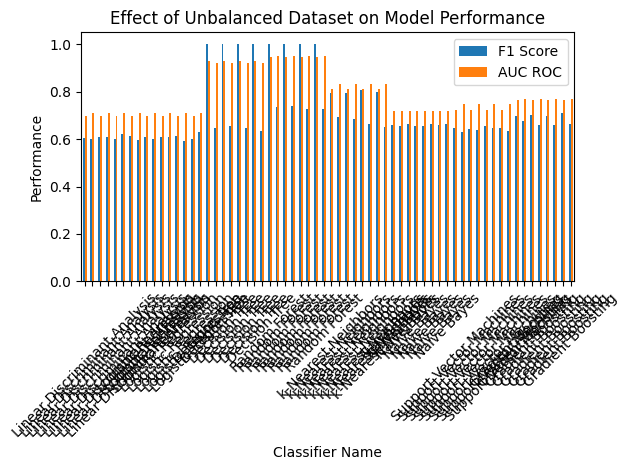

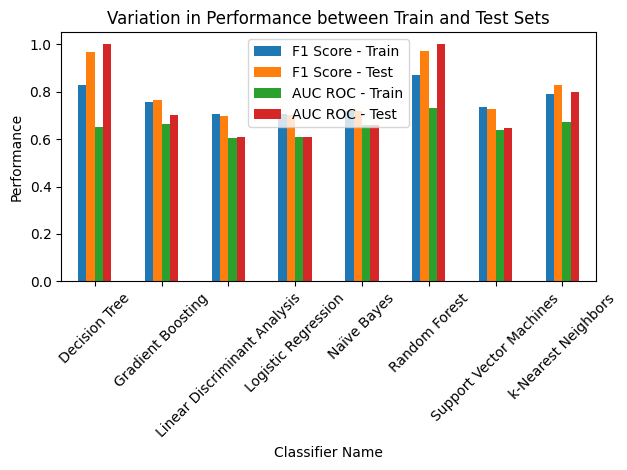

In [64]:
# Step 3: Create appropriate graphs
import matplotlib.pyplot as plt

# Plot the effect of an unbalanced dataset on model performance
unbalanced_data.plot(x='Classifier Name', y=['F1 Score', 'AUC ROC'], kind='bar', title='Effect of Unbalanced Dataset on Model Performance')
plt.xlabel('Classifier Name')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.legend(['F1 Score', 'AUC ROC'])
plt.tight_layout()
plt.show()

# Plot the variation in performance between train and test sets
train_test_variation = combined_data.pivot_table(index='Classifier Name', columns='Dataset', values=['F1 Score', 'AUC ROC'], aggfunc='mean')
train_test_variation.plot(kind='bar', title='Variation in Performance between Train and Test Sets')
plt.xlabel('Classifier Name')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.legend(['F1 Score - Train', 'F1 Score - Test', 'AUC ROC - Train', 'AUC ROC - Test'])
plt.tight_layout()
plt.show()